In [1]:
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
dataset_folder = "../datasets/"

In [3]:
import sys
sys.path.insert(0, '../platemate/platemate/')
import platemate as pm

In [4]:
ColumnNames = {
    "Z10M" : "A",
    "Z5M"  : "B",
    "Z10A" : ["C1","C4"],
    "Z5A"  : ["C5","C12","D1","D12"],
    "Z10T" : ["E1","E4"],
    "Z5T"  : ["E5","E12","F1","F12"],
    "Z5S"  : ["G"]
    }

controlNames = {
    "cc1690"  : ["H1","H6"],
    "TAP"     : ["H7","H9"],
    "mCh" : ["H10","H12"]
    }


## Setting up PlateMate

In [5]:
reload(pm)
experiment = pm.PlateMate( colonyMap = ColumnNames, controlMap = controlNames )

Confirming that PlateMate is now aware of the colony names.

In [6]:
print experiment.getColonyNames()

['Z5S', 'Z10A', 'Z5T', 'Z10M', 'Z5A', 'Z10T', 'Z5M']


Finding the files to be read

In [7]:
experiment.findFiles("20161003 pJP22mcherry", extension = "xlsx", path = dataset_folder)
print experiment.FLlist

['../datasets/20161003 pJP22mcherry 01.xlsx'
 '../datasets/20161003 pJP22mcherry 02.xlsx'
 '../datasets/20161003 pJP22mcherry 03.xlsx'
 '../datasets/20161003 pJP22mcherry 04.xlsx'
 '../datasets/20161003 pJP22mcherry 05.xlsx'
 '../datasets/20161003 pJP22mcherry 06.xlsx']


## Reading channels

Reading mcherry channel:

In [8]:
experiment.readfromSpreadSheet("mCherry", 36)
experiment.FLdata["mCherry"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,5906,4512,4368,5048,4359,4401,4593,5385,21265,4597,...,4384,4112,3809,4688,4655,3650,3925,28013,29253,29582
1,3787,2659,2625,3443,3499,3463,2965,2913,2970,4617,...,4019,5072,4472,2518,5684,5602,5116,14484,14418,15222
2,3529,3618,3294,3715,3618,3813,4163,4105,4290,3855,...,3448,5788,4834,3485,5926,4888,5125,19756,19817,19479
3,4076,3786,3699,3064,3457,4212,3121,4313,5045,5192,...,2850,4717,2819,2455,5139,4572,5008,17971,19103,17881
4,3282,3296,4406,4969,3470,3437,3503,3804,4499,3948,...,2708,5351,3380,2974,5805,5806,6059,18738,18548,18679
5,4411,5135,4348,4274,4275,4027,3630,3524,4286,4729,...,2830,4911,2757,2341,5528,4955,5463,18285,19462,18292


Reading the blue channel

In [9]:
experiment.readfromSpreadSheet("Blue", 74)
experiment.FLdata["Blue"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,25386,20823,21310,23226,21077,23416,21139,22382,29034,22155,...,19825,19963,19279,19034,19933,20249,21203,31340,28922,29218
1,14906,11427,12442,18068,13824,12595,13698,14535,16830,20082,...,13341,20806,13916,10940,21808,23044,21977,19761,18990,18878
2,16824,17392,18923,20759,18056,18619,18373,18354,18461,20591,...,15584,21946,15539,13462,24543,23291,24765,25099,24867,24576
3,17903,17546,18679,21218,18218,18658,19463,19482,19068,25511,...,15043,23709,14376,10912,25629,25350,26084,27366,27825,28952
4,17636,17100,19860,23036,17496,19249,19539,19815,20229,23010,...,14223,25688,12272,11413,26108,26463,26277,24964,25535,27034
5,16643,16946,19847,22813,17228,19438,19304,20013,20270,22970,...,11139,22557,10779,9868,25230,26702,25276,29172,29333,27463


Reading the absorbance

In [10]:
experiment.readfromSpreadSheet("OD",106)
experiment.FLdata["OD"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,0.1156,0.1004,0.0967,0.0961,0.0996,0.1148,0.1024,0.1016,0.1337,0.1071,...,0.1174,0.1153,0.1207,0.1234,0.0966,0.0939,0.0891,0.1011,0.0972,0.0985
1,0.4222,0.1800,0.2405,0.1133,0.2486,0.2406,0.2068,0.1723,0.1048,0.0936,...,0.1864,0.1574,0.1791,0.2360,0.1063,0.1027,0.0999,0.1369,0.1578,0.1180
2,0.1408,0.1132,0.1051,0.1080,0.1101,0.1145,0.1001,0.0999,0.0963,0.0920,...,0.1668,0.1269,0.1797,0.2060,0.0936,0.0926,0.0900,0.1996,0.1923,0.2061
3,0.1282,0.1364,0.0994,0.0982,0.1243,0.1070,0.1036,0.1007,0.0976,0.0815,...,0.1936,0.1046,0.2020,0.2660,0.0787,0.0782,0.0768,0.2089,0.2088,0.2210
4,0.1347,0.1533,0.0989,0.0906,0.1311,0.1055,0.1031,0.0995,0.0985,0.0804,...,0.2457,0.1097,0.2644,0.3679,0.0791,0.0781,0.0757,0.2404,0.2262,0.2280
5,0.1826,0.2165,0.1172,0.1162,0.1711,0.1232,0.1274,0.1150,0.1121,0.0840,...,0.3980,0.1200,0.4018,0.4363,0.0814,0.0784,0.0764,0.2062,0.2161,0.2594


Reading the chlorophyla channel

In [11]:
experiment.readfromSpreadSheet("Chloro", 144)
experiment.FLdata["Chloro"]

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0,455,482,362,416,346,530,644,152,416,265,...,862,109,971,583,9,9,9,217,230,226
1,1217,1054,400,880,632,371,440,430,457,200,...,1367,260,1686,1974,8,8,6,64,54,54
2,1215,1655,559,325,1111,594,575,380,347,210,...,2454,152,2708,4522,8,8,8,101,79,82
3,2608,2867,890,460,1699,834,957,756,535,468,...,3820,358,4361,6101,11,9,9,105,86,101
4,3170,3424,1102,503,1728,965,1027,708,540,355,...,4936,680,5573,7867,9,10,7,74,51,66
5,4682,6113,2533,2155,3802,2153,2440,1514,1113,684,...,8254,1586,9325,9733,7,8,6,122,119,128


Now, let's use platemate API to access only the data from Z5S for each channel:

In [12]:
experiment.getFluorescence("Z5S","mCherry")

,G01,G02,G03,G04,G05,G06,G07,G08,G09
0,3906,5069,4531,4582,4111,4165,3917,4880,4346
1,3490,2942,4145,3420,4110,4821,4860,5352,6378
2,4737,4536,4729,3949,4679,4853,5345,5057,5287
3,3039,3445,3250,3427,4901,3719,4154,4433,4466
4,3528,3954,3840,4066,4091,3179,4261,6098,5087
5,3727,4184,3151,3466,4114,2852,3983,4453,4915


In [13]:
experiment.getFluorescence("Z5A","mCherry")

,C05,C06,C07,C08,C09,C10,C11,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11
0,3949,3538,5852,4047,3053,3571,5200,6831,5012,4473,4293,4544,3984,5956,5035,3884,3481,4102
1,3003,2978,3006,3248,3400,3851,5504,4069,3976,2616,3789,4239,4041,5054,5329,3433,4078,3913
2,5039,4022,3592,3900,3405,5639,5273,5532,4518,3942,4098,5183,4447,6692,5454,4722,4219,4747
3,5954,3864,3505,3845,3316,4724,4369,5630,4279,4466,3667,4495,3843,4472,4627,3700,4466,3806
4,5478,3726,4381,4304,3361,4232,4450,6523,4245,3846,3952,4674,4003,6134,5043,4120,3796,4373
5,4435,5128,4726,3775,3490,4547,4907,6035,3981,3869,3522,4026,3568,4073,4439,2810,3984,3711


The OD of this colony:

In [21]:
experiment.getFluorescence("Z5A","OD")

,H01,H02,H03,H04,H05
0,0.1804,0.1174,0.1153,0.1207,0.1234
1,0.2060,0.1864,0.1574,0.1791,0.2360
2,0.1965,0.1668,0.1269,0.1797,0.2060
3,0.1895,0.1936,0.1046,0.2020,0.2660
4,0.1917,0.2457,0.1097,0.2644,0.3679
5,0.2580,0.3980,0.1200,0.4018,0.4363


Let's normalize all data using the OD channel

In [15]:
experiment.normalizeAllFluorescence("mCherry","OD")
experiment.getFluorescence("Z5A","mCherry")

,C05,C06,C07,C08,C09,C10,C11,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11
0,34458.986952,26864.086224,37803.618107,34008.402578,27603.977774,28844.910672,36723.164392,40158.729337,38056.189981,35415.674967,32157.304606,42626.641069,30319.633773,41418.635464,39802.372929,43788.051347,40011.495404,46613.636616
1,18123.113678,13831.862919,16135.266169,19264.532236,19801.980110,24765.274147,62902.858214,20686.323645,21954.721637,14217.391277,14964.455298,41640.470630,24944.444371,19408.602357,15147.811484,34433.301139,37310.154697,31607.430820
2,37830.328996,30172.541689,24123.572505,27215.632140,27773.247094,35133.955316,54869.925716,30114.317595,31418.635834,28985.292542,27175.065484,63673.219018,37213.390272,29689.440887,22593.205975,51947.196743,43271.796459,39624.373499
3,29114.913764,24210.525625,19914.772835,26156.462606,22269.979517,30108.348585,47232.431824,29522.811539,24791.425103,30134.951690,24777.026708,54884.004501,32706.383062,22898.105722,26424.900251,38341.968178,45946.502627,34949.493943
4,24576.042716,16806.495432,21981.936113,25287.895824,18306.100857,25883.792672,53485.576777,32977.756052,24146.758275,21097.092544,24245.398401,56723.299879,32973.641219,32420.718992,30508.167572,42782.970569,39255.430062,45128.998424
5,12755.248785,14296.068852,16014.910011,11397.946735,11096.979189,18079.522109,50276.640315,18888.888931,11095.317912,14303.142102,14230.302893,44000.000401,20112.740372,18944.185731,22881.442624,21111.945429,36251.138153,30925.000691


## Quick plots:

Plotting the **normalized** fluorescences

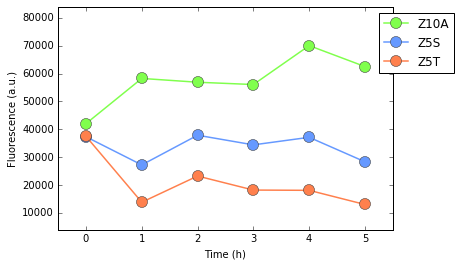

In [26]:
experiment.plotMean("mCherry", ["Z10A","Z5S","Z5T"])

pl.xlim(-0.5,5.5)
pl.legend( numpoints = 1, bbox_to_anchor = (1.2,1.0))

Let's look also at the standard deviation of these populations

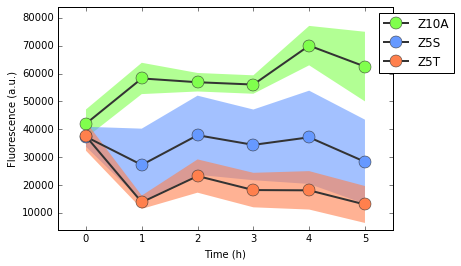

In [27]:
experiment.plotFuzzyMean("mCherry", ["Z10A","Z5S","Z5T"])

pl.xlim(-0.5,5.5)
pl.legend( numpoints = 1, bbox_to_anchor = (1.2,1.0))

(0, 72000)

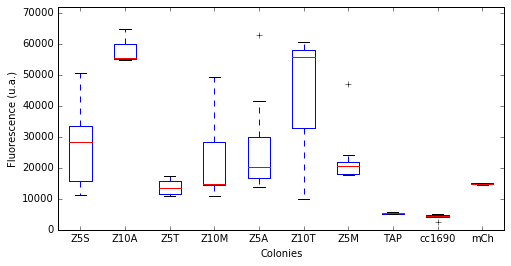

In [28]:
pl.figure( figsize=(8,4) )
experiment.snapshotBoxWhiskers("mCherry", 1, showControl = True)
pl.ylim(0,72000)